1. making it so that the python code can read a model that is stored online in a shared file
2. Make it update in real time from yahoo finance
3. find a database with expectations perhaps
4. sensitivity table for intrinsic value?
5. analyst assigned risk for the stock
6. arrange from top to bottom by current/prospective holdings
7. new ticker lookup function??? Perhaps add in update
8. download and chart price data, highs and lows, etc.
9. assign cost-basis? Maybe include time value of holding?
10. update current value of holdings? Use close data or 10 min delay?
11. 



Submit Project Proposal in Jupyter Notebook
(1000 words; at least 2 data sources; at least 2 different types of data visualizations)

In [1]:
# use plotly.com/python
# consider buying the book of dash
# https://nostarch.com/book-dash
# FAMA 1970

# burton malkial a random walk down wall street
# long memory time series
# read pdf table python
# from tabula import read_pdf

# parquay is one of the most efficient data types


# https://plotly.com/python/


# https://nostarch.com/book-dash
# https://www.sec.gov/dera/data/financial-statement-data-sets
# https://pypi.org/project/tabula-py/
# https://pandas.pydata.org/pandas-docs/version/1.1/reference/api/pandas.DataFrame.to_parquet.html
# https://arrow.apache.org/docs/python/install.html

import pandas as pd
import datetime
import requests
from requests.exceptions import ConnectionError
from bs4 import BeautifulSoup


def web_content_div(web_content, class_path):
    web_content_div = web_content.find_al("div", {"class": class_path})
    try:
        spdns = web_content_div[0].find_all("span")
        texts = [spans.get_text() for span in spans]
    except IndexError:
        texts = []
    return texts



def real_time_price(stock_code):
    url = "https://finance.yahoo.com/quote/BRK-B?p=BRK-B&.tsrc=fin-srch"
    try: 
        r = requests.get(url)
        web_content = BeautifulSoup(r.text, "lxml")
        texts = web_content_div(web_content, "Fw(b) Fz(36px) Mb(-4px) D(ib)")
        price, change
    except ConectionError:
        price, change = [], []
    return price, change



# The above code is abandoned and produced no results

In [67]:
#!pip install pandas-datareader
#!pip install yfinance
#!pip install yahooquery

import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["ENPH", "SMG", "MBUU", "TREX"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
close_data = pd.concat([val["Close"]for val in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
close_data.head()

ENPH        SMG  MBUU     TREX
Date                                      
2012-01-03   NaN  47.290001   NaN  2.88250
2012-01-04   NaN  47.570000   NaN  2.90375
2012-01-05   NaN  47.450001   NaN  2.92375
2012-01-06   NaN  47.619999   NaN  2.88750
2012-01-09   NaN  47.759998   NaN  2.87875

# Below allowed me to retrieve some stock data, but this was just pricing data. We are interested in seeing more about the fundamentals of the business in addition

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\2693607136.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


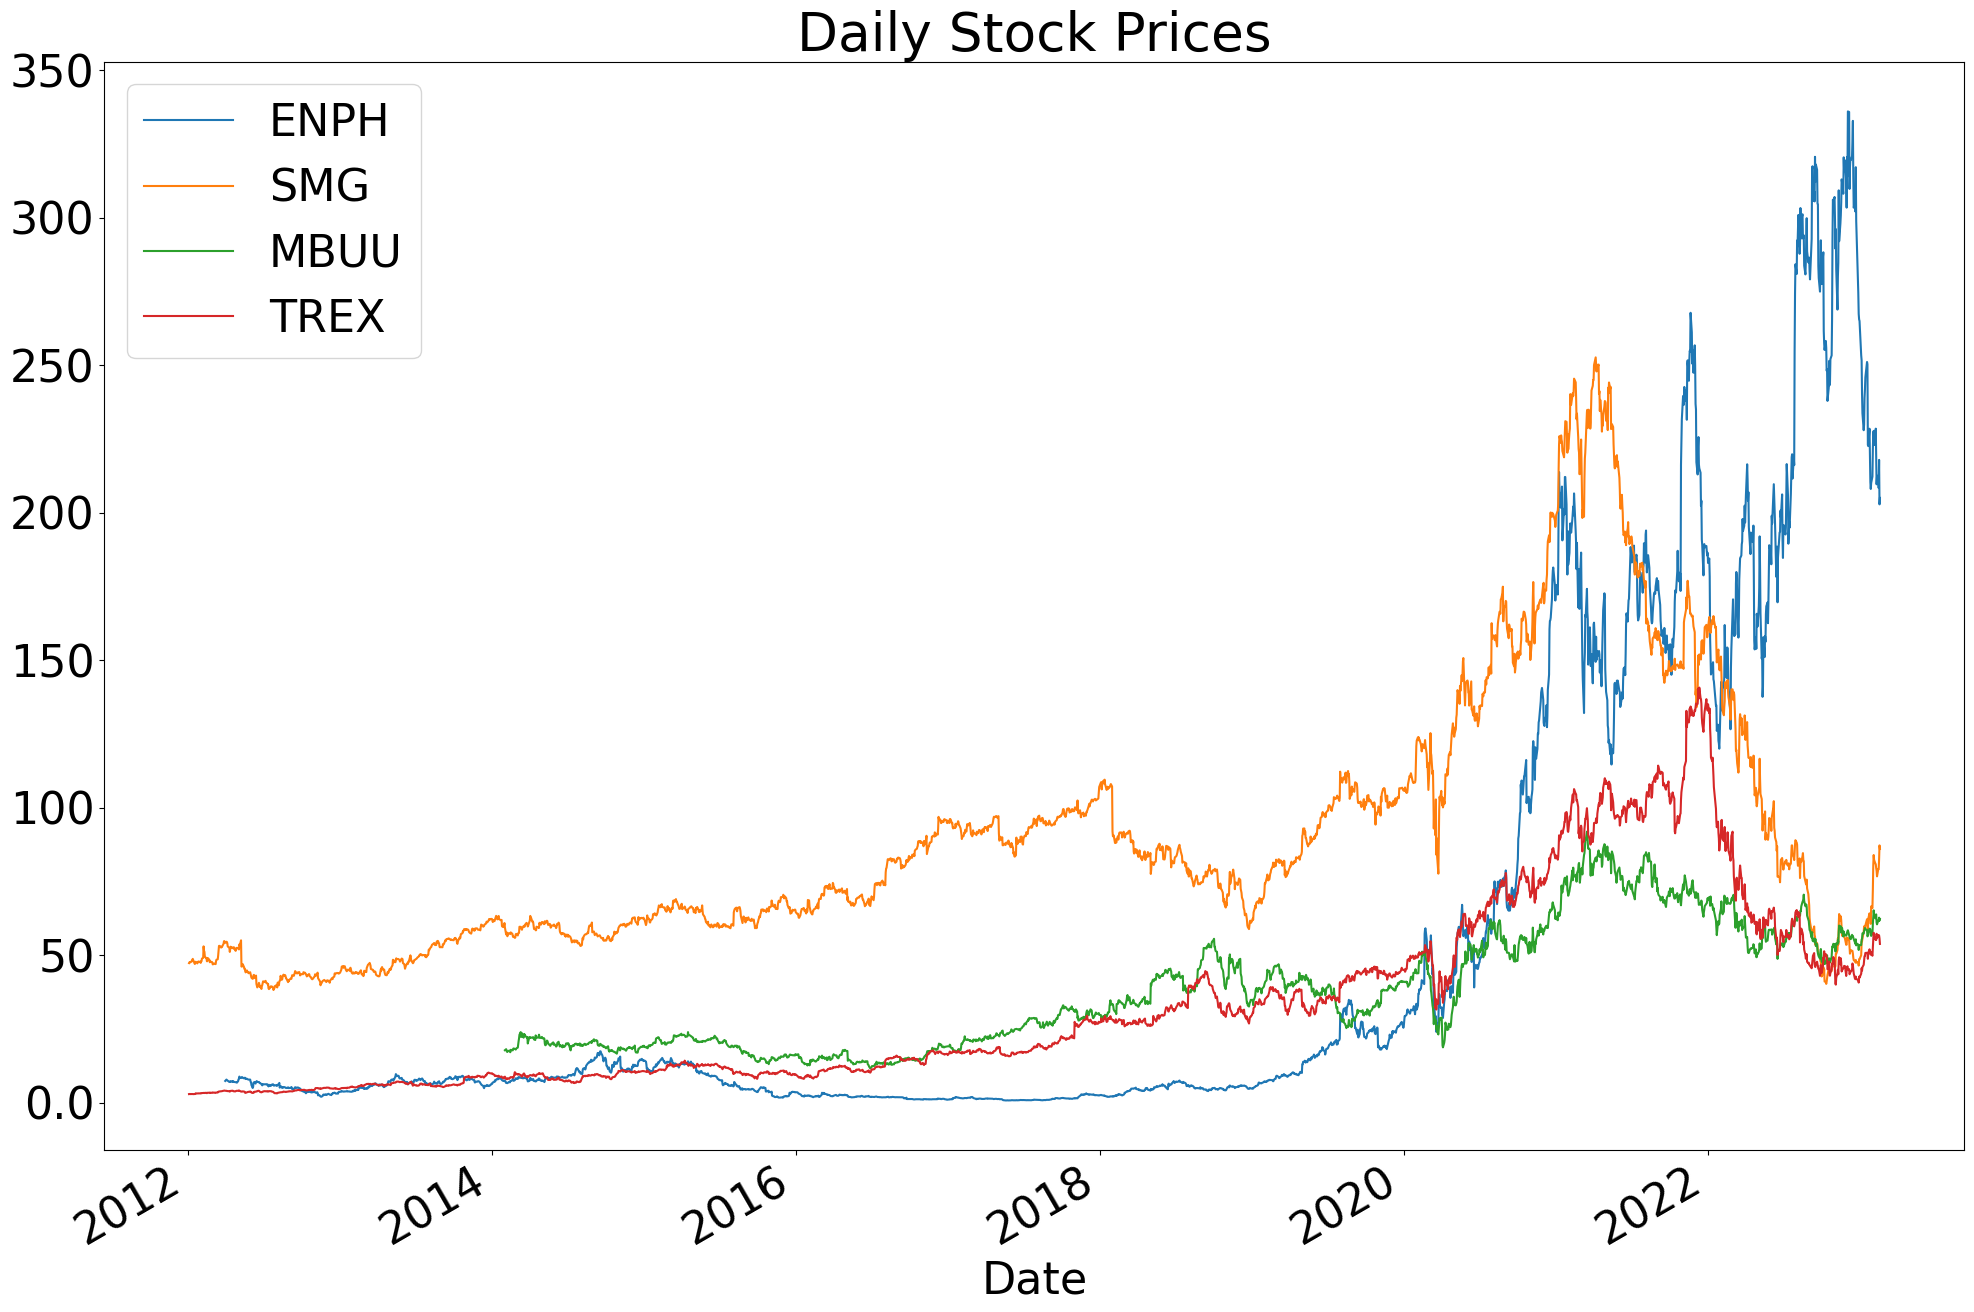

In [5]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\765046561.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


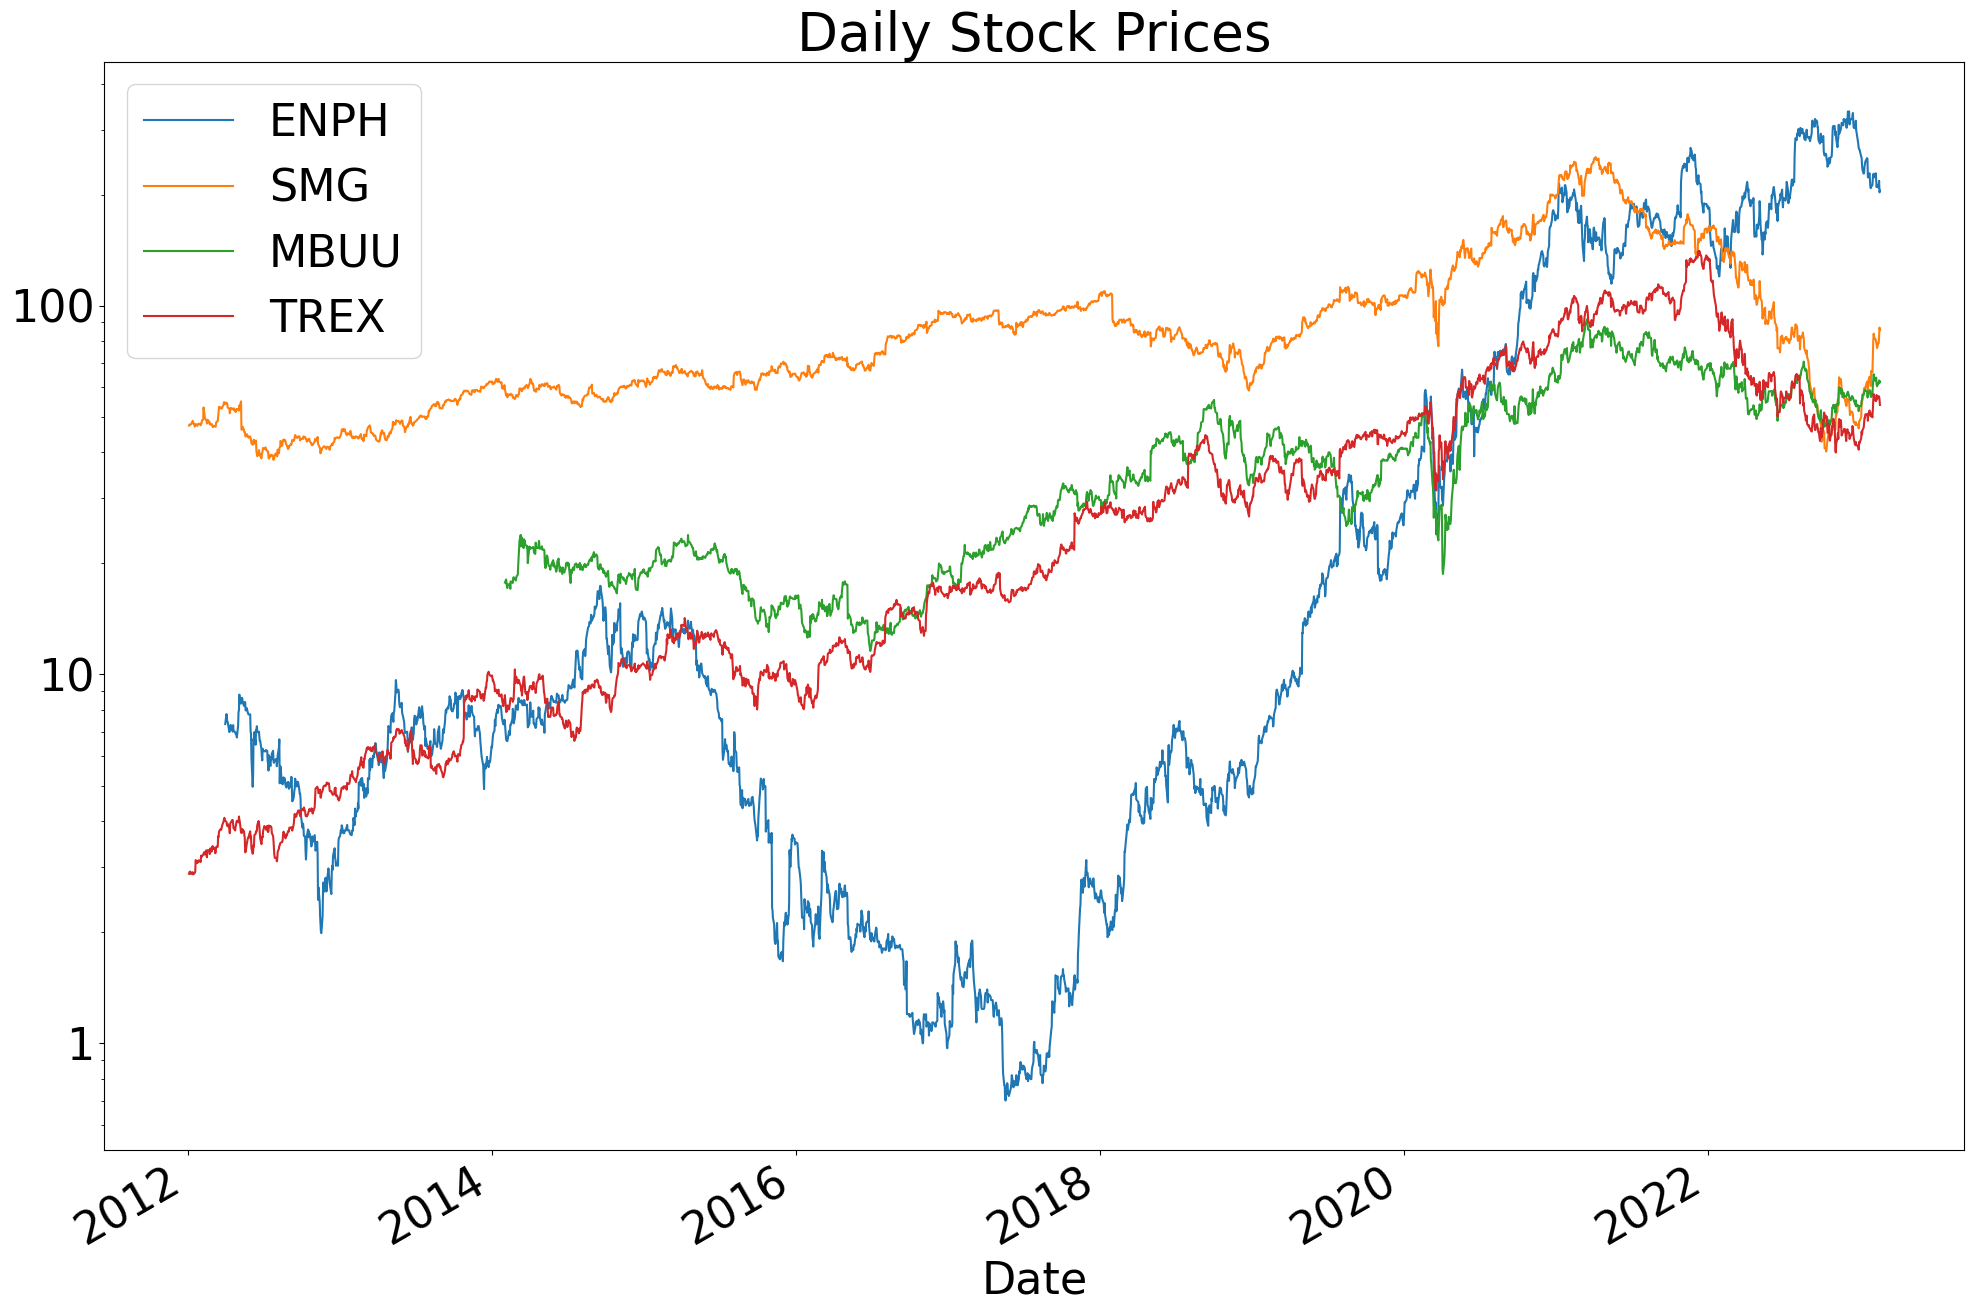

In [6]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

In [7]:
# this is to build a way to pull stock data for one stock at a time

def stock_data(stock):
        data_dict = {}
        stock = [stock]
        for key in stock:
            data_dict[key] = web.get_data_yahoo(key, start, end)
        return data_dict
    
stock_data("MSFT")

[*********************100%***********************]  1 of 1 completed


{'MSFT':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413067   
 2012-01-04   26.820000   27.469999   26.780001   27.400000   21.916998   
 2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140966   
 2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484922   
 2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188963   
 ...                ...         ...         ...         ...         ...   
 2023-02-13  267.640015  274.600006  267.149994  271.320007  270.642120   
 2023-02-14  272.670013  274.970001  269.279999  272.170013  271.490021   
 2023-02-15  268.320007  270.730011  266.179993  269.320007  269.320007   
 2023-02-16  264.019989  266.739990  261.899994  262.149994  262.149994   
 2023-02-17  259.390015  260.089996  256.000000  258.059998  258.059998   
 
               

# Here we explore making an info tab using tickers from wikipedia to retrieve Dow. 

In [8]:
tickers = pd.read_html(
    "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
tickers = tickers.Symbol.to_list()

In [9]:
df = pd.DataFrame()
for ticker in tickers:
    # right now yahoo doesn't like .info
    ticker_ = yf.Ticker(ticker)
    var = ticker_.fast_info
    frame = pd.DataFrame(var)
    df = df.append(frame)
df

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\1332289574.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(frame)
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\1332289574.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(frame)
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\1332289574.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(frame)
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\1332289574.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(frame)
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_3924\133228957

0
0               currency
1                dayHigh
2                 dayLow
3               exchange
4        fiftyDayAverage
..                   ...
15              timezone
16  twoHundredDayAverage
17            yearChange
18              yearHigh
19               yearLow

[600 rows x 1 columns]

In [10]:
msft_ = yf.Ticker("MSFT").fast_info

In [11]:
# This is a breakthrough where I am finally able to retrieve a specific key
# However, there is an issue with yfinance hiding these values, need to find
# a better way to get this data
msft_frame = {}
tickers = ["MSFT", "AAPL", "TSLA", "ENPH"]

def stockdata_(tickers):
    msft_frame = {}
    for tickerz in tickers:
        individual_ = yf.Ticker(tickerz).fast_info
        msft_frame[tickerz] = {}
        for column in individual_:
            msft_frame[tickerz][column] = individual_[column]
            
    return msft_frame

pd.DataFrame(stockdata_(tickers)).T
#EUREKA!!! I HAVE MADE IT WORK!!!!

currency     dayHigh      dayLow exchange fiftyDayAverage   lastPrice  \
MSFT      USD  255.470001  251.589996      NMS        246.5116  252.669998   
AAPL      USD  151.289993  148.404999      NMS      140.097999  148.479996   
TSLA      USD  209.710007  197.220001      NMS        154.5936  197.369995   
ENPH      USD       207.0  200.619995      NGM        251.5842  201.649994   

     lastVolume            marketCap        open previousClose quoteType  \
MSFT   26989254    1880824948540.875  254.479996        258.36    EQUITY   
AAPL   62154122  2349235611142.03125  150.199997        152.62    EQUITY   
TSLA  177829253    624498420497.8125  204.990005        209.44    EQUITY   
ENPH    3240091   27524617603.688477  203.690002         204.6    EQUITY   

     regularMarketPreviousClose       shares tenDayAverageVolume  \
MSFT                 258.059998   7443800064            36640560   
AAPL                 152.550003  15821899776            64755690   
TSLA                 208.309998   3164100096           198620370   
ENPH                 204.990005    136496992             6345500   

     threeMonthAverageVolume          timezone twoHundredDayAverage  \
MSFT                30915858  America/New_York            253.37455   
AAPL                75160662  America/New_York            147.39375   
TSLA               164217130  America/New_York            223.70605   
ENPH                 4226840  America/New_York             251.0943   

     yearChange    yearHigh     yearLow  
MSFT  -0.103086  315.950012  213.429993  
AAPL  -0.071629  179.610001  124.169998  
TSLA   -0.23931  384.290009  101.809998  
ENPH   0.540931  339.920013      118.57

In [12]:
from yahooquery import Ticker

ticker_list = ["MSFT", "AAPL", "TSLA", "ENPH"]

query_list = Ticker(ticker_list)

df = query_list.summary_detail

lm = pd.DataFrame(df)
lm

MSFT                 AAPL  \
maxAge                                          1                    1   
priceHint                                       2                    2   
previousClose                              258.06               152.55   
open                                       254.48                150.2   
dayLow                                     251.59              148.405   
dayHigh                                    255.47               151.29   
regularMarketPreviousClose                 258.06               152.55   
regularMarketOpen                          254.48                150.2   
regularMarketDayLow                        251.59              148.405   
regularMarketDayHigh                       255.47               151.29   
dividendRate                                 2.72                 0.92   
dividendYield                              0.0105                0.006   
exDividendDate                2023-02-14 16:00:00  2023-02-09 16:00:00   
payoutRatio                                0.2822               0.1545   
fiveYearAvgDividendYield                     1.14                 0.96   
beta                                      0.91562             1.277894   
trailingPE                              28.074444            25.208828   
forwardPE                               23.526072             22.56535   
volume                                   26989254             62154122   
regularMarketVolume                      26989254             62154122   
averageVolume                            31046250             75440123   
averageVolume10days                      36640560             64755690   
averageDailyVolume10Day                  36640560             64755690   
bid                                        252.67               148.53   
ask                                        252.89               148.57   
bidSize                                       800                 1100   
askSize                                      2200                  900   
marketCap                           1880825004032        2349235699712   
fiftyTwoWeekLow                            213.43               124.17   
fiftyTwoWeekHigh                           315.95               179.61   
priceToSalesTrailing12Months             9.215485             6.061965   
fiftyDayAverage                          246.5116              140.098   
twoHundredDayAverage                    253.37456            147.39375   
trailingAnnualDividendRate                    2.6                 0.91   
trailingAnnualDividendYield              0.010075             0.005965   
currency                                      USD                  USD   
fromCurrency                                 None                 None   
toCurrency                                   None                 None   
lastMarket                                   None                 None   
coinMarketCapLink                            None                 None   
algorithm                                    None                 None   
tradeable                                   False                False   

                                      TSLA         ENPH  
maxAge                                   1            1  
priceHint                                2            2  
previousClose                       208.31       204.99  
open                                204.99       203.69  
dayLow                              197.22       200.62  
dayHigh                             209.71        207.0  
regularMarketPreviousClose          208.31       204.99  
regularMarketOpen                   204.99       203.69  
regularMarketDayLow                 197.22       200.62  
regularMarketDayHigh                209.71        207.0  
dividendRate                           NaN          NaN  
dividendYield                          NaN          NaN  
exDividendDate                         NaN          NaN  
payoutRatio                            0.0        

In [13]:
asset_profiles = query_list.asset_profile
asset_profiles

{'MSFT': {'address1': 'One Microsoft Way',
  'city': 'Redmond',
  'state': 'WA',
  'zip': '98052-6399',
  'country': 'United States',
  'phone': '425 882 8080',
  'fax': '425 706 7329',
  'website': 'https://www.microsoft.com',
  'industry': 'Software—Infrastructure',
  'sector': 'Technology',
  'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Cl

In [14]:
#import sqlalchemy
#
#engine = sqlalchemy.create_engine("sqlite:///Fundamentals.db")
#lm.to_sql("Fundamentalstable", engine, index=False)

ValueError: Table 'Fundamentalstable' already exists.

In [ ]:
#pd.read_sql("Fundamentalstable", engine, index_col=["symbol"])

In [ ]:
# we now have a way to pull last prices of stocks and upload in dashboard!!!
    

In [ ]:
# for some reason the income statement function in yf isn't working right now, 
# but this would be helpful to compare our projections with realized milestones
#msft = yf.Ticker("MSFT")
#msft.income_stmt

In [ ]:
#msft.shares

In [ ]:
#msft.sustainability

In [ ]:
#ticker = "AAPL"
#print("ticker: %s"%(ticker))
#yf_info = yf.Ticker(ticker)
#bs = yf_info.balance_sheet
#print(bs)

# this is a new pathway I took since I continued to get errors while trying to download data from yfinance due to new encoding

In [ ]:
# https://towardsdatascience.com/stock-fundamental-analysis-eda-of-secs-quarterly-data-summary-455e62ff4817

In [ ]:
# run analysis on downloaded quarterly dataset from SEC website
import os

In [ ]:
# folder with unzipped data

# load content of sub file into DF
# sub = pd.read_csv("sub-Copy1.txt", sep=" ",header=None)


#WHY WON"T THIS STUPID READCSV CODE JUST WORKKKKK
#URGGGGHGHGHGHGHHGHH


In [ ]:
msft.dividends

In [ ]:
# pd.read_fwf("sub-Copy1.txt")

In [35]:
# pd.read_table("sub-Copy1.txt", delimiter=" ")

In [36]:
ex = yf.Ticker("msft")


In [37]:
ticker_list = ["MSFT", "AAPL", "TSLA", "ENPH"]


for key in dir(ex):
    try:
        print(key)
        print(getattr(ex, key))
    except:
        continue

__class__
<class 'yfinance.ticker.Ticker'>
__delattr__
<method-wrapper '__delattr__' of Ticker object at 0x000001E97414D910>
__dict__
{'ticker': 'MSFT', 'session': None, '_history': None, '_history_metadata': None, '_base_url': 'https://query2.finance.yahoo.com', '_scrape_url': 'https://finance.yahoo.com/quote', '_tz': None, '_isin': None, '_news': [], '_shares': None, '_earnings_dates': {}, '_earnings': None, '_financials': None, '_data': <yfinance.data.TickerData object at 0x000001E97414D880>, '_analysis': <yfinance.scrapers.analysis.Analysis object at 0x000001E97A512910>, '_holders': <yfinance.scrapers.holders.Holders object at 0x000001E97B5B7610>, '_quote': <yfinance.scrapers.quote.Quote object at 0x000001E979849910>, '_fundamentals': <yfinance.scrapers.fundamentals.Fundamentals object at 0x000001E97A4DE100>, '_fast_info': lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', '

incomestmt
info
None
institutional_holders
                              Holder     Shares Date Reported   % Out  \
0         Vanguard Group, Inc. (The)  642664898    2022-12-30  0.0863   
1                     Blackrock Inc.  532042708    2022-12-30  0.0715   
2           State Street Corporation  294574683    2022-12-30  0.0396   
3                           FMR, LLC  198985661    2022-12-30  0.0267   
4      Price (T.Rowe) Associates Inc  168647376    2022-12-30  0.0227   
5      Geode Capital Management, LLC  142731177    2022-12-30  0.0192   
6                     Morgan Stanley  119417954    2022-12-30  0.0160   
7          JP Morgan Chase & Company   93021058    2022-12-30  0.0125   
8            Capital World Investors   91715063    2022-12-30  0.0123   
9  Norges Bank Investment Management   86316926    2022-12-30  0.0116   

          Value  
0  162382138600  
1  134431230056  
2   74430184614  
3   50277706600  
4   42612132185  
5   36063886231  
6   30173334218  
7   23503

quarterly_balancesheet
quarterly_cash_flow
quarterly_cashflow
quarterly_earnings
Empty DataFrame
Columns: []
Index: []
quarterly_financials
quarterly_income_stmt
quarterly_incomestmt
recommendations
None
recommendations_summary
None
revenue_forecasts
None
session
None
shares
None
splits
Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64
stats
<bound method TickerBase.stats of yfinance.Ticker object <MSFT>>
sustainability
None
ticker
MSFT


In [53]:
ex._earnings_history
print(ex._earnings_history)

AttributeError: 'Ticker' object has no attribute '_earnings_history'

In [41]:
ex.cashflow

Exception: yfinance failed to decrypt Yahoo data response

In [54]:
ex.dividends

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-02-16 00:00:00-05:00    0.62
2022-05-18 00:00:00-04:00    0.62
2022-08-17 00:00:00-04:00    0.62
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
Name: Dividends, Length: 77, dtype: float64

In [68]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            # .first() or .last() .median() ...
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()            
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [1]:
start = datetime.datetime(1998,1,1)
end = datetime.datetime.today()
data_codes = {"CPI":"FPCPITOTLZGUSA"}
gather_data(data_codes, start = start, end = end, freq = "Y")

NameError: name 'datetime' is not defined